# Bankruptcy Prediction Model: Analyzing Financial Distress Indicators

### Understanding the Problem
The bankruptcy forecast plays a significant role in finance, as it gives insight to investors, creditors, and stakeholders regarding the potential insolvency of a company. Accurate predictions facilitate the decision-making process, enable the identification and correction of errors, and improving resource utilization.

### Project Objective

This proposal intends to design a machine learning model that forecasts bankruptcies on the basis of key financial measurements. The model adopts a data-driven approach to provide higher prediction accuracy for stakeholders.

### Data Source
In order to create our prediction model well be using the "US Company Bankruptcy Prediction Dataset by Utkarsh Singh" found on Kaggle https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset/data 


## Loading and Examining the Data 



In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import warnings

#Load csv into a Pandas Dataframe and output
df = pd.read_csv("american_bankruptcy.csv")
#warnings.filterwarnings('ignore', category=DeprecationWarning)
df

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [377]:
# The column names make no sense so we refer to the original dataset dictionary and rename the columns and save into a 

df.rename(columns={df.columns[3]: 'Current Assets', # Short-term assets that are expected to be converted to cash within a year.
                   df.columns[4]: 'Cost Of Goods Sold', # Amount a company paid as a cost directly related to the sale of products
                   df.columns[5]: 'Depreciation and amortization', # Reduction in the value of tangible and intangible assets over time.
                   df.columns[6]: 'EBITDA', # Earnings Before Interest, Taxes, Depreciation, and Amortization. - Measure of a companies fincial performance
                   df.columns[7]: 'Inventory', # The value of a company's raw materials, work-in-progress goods, and finished goods.
                   df.columns[8]: 'Net Income', # The overall profitability of a company after all expenses and costs have been deducted from total revenue
                   df.columns[9]: 'Total Receivables', # Money owed to the company by its customers.
                   df.columns[10]: 'Market value', # The total value of the company's shares of stock.
                   df.columns[11]: 'Net sales', # Revenue from goods sold or services provided.
                   df.columns[12]: 'Total assets', #  Sum of current and long-term assets owned by the company.
                   df.columns[13]: 'Total Long-term debt', #  Debt obligations due in more than one year.
                   df.columns[14]: 'EBIT', # Earnings Before Interest and Taxes.
                   df.columns[15]: 'Gross Profit', # Revenue minus the cost of goods sold.
                   df.columns[16]: 'Total Current Liabilities', # Obligations due within one year -  sum of accounts payable, accrued liabilities, and taxes such as bonds payable at the end of the year, salaries, and commissions remaining
                   df.columns[17]: 'Retained Earnings', #  Accumulated net income not distributed to shareholders.
                   df.columns[18]: 'Total Revenue', #  Total income from all sources.
                   df.columns[19]: 'Total Liabilities', # Sum of current and long-term liabilities.
                   df.columns[20]: 'Total Operating Expenses' # Expenses related to normal business operations.
                  },inplace=True) 

# Store these renamed columns into a new CSfile  
df.to_csv('American_Bankruptcy.csv', index=True)



In [378]:
df_AB = pd.read_csv("American_Bankruptcy.csv")
df_AB = df_AB.drop(df_AB.columns[0], axis=1)
df_AB

,company_name,status_label,year,Current Assets,Cost Of Goods Sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,...,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current Assets                 78682 non-null  float64
 4   Cost Of Goods Sold             78682 non-null  float64
 5   Depreciation and amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market value                   78682 non-null  float64
 11  Net sales                      78682 non-null  float64
 12  Total assets                   78682 non-null 



### Intial Observations of the Dataset
1) We observe total of 8971 companies withing our data set
2) There are a total of 78681 data entries since each comapany has multiple years of data
3) Within the data-set we have 18 different indicators and fincial measurments of each company
4) We have a status_label column which tells use whether each company was alive or if it failed
    - As our Target variable we dont want it to be am object value


### Target Variable
 Define the dependent variable representing bankruptcy status (e.g., 'Bankruptcy' coded as 1 for bankrupt companies and 0 for non-bankrupt).

Address whether the dataset has a balanced or imbalanced target variable (bankruptcy vs. non-bankruptcy)


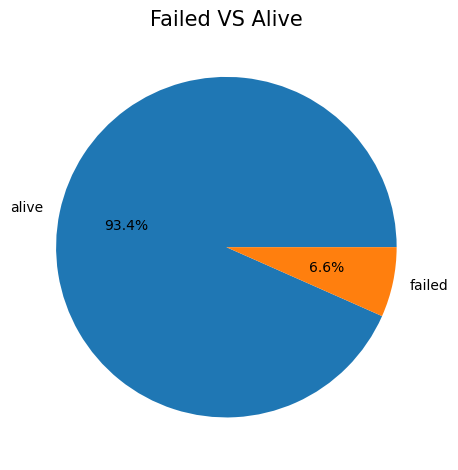

In [380]:
# Recode and rename target variable 

df_AB['status_label'] = df['status_label'].apply(lambda x : 0 if x == 'alive' else 1)

df_AB.iloc[40:60]

df.groupby('status_label').size().plot(kind='pie',
                                       autopct='%.1f%%')

plt.title('Failed VS Alive', size=15)
plt.tight_layout()
plt.show()



## Data Cleaning and Pre-prossesing 

### Handling Missing values


In [381]:
 # Check columns for missing values 
df_AB.columns[df.isna().any()].tolist()

[]

This doesnt happen preety often but preety lucky to have no Null values in our data set

### Outlier Detection 

In order to get a better understanding of our data well use the help of Blox plots to help us better visualize the 

In [382]:
%pip install seaborn

# Create boxplots for each column
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df) # For the purpose of Identifying columns well use the Xs 

<AxesSubplot:>


 Data transformation 

Justify the need for scaling features.
Describe the method used (e.g., Min-Max normalization, z-score standardization).

 Encoding Categorical Variables
If applicable, explain how categorical variables were encoded (e.g., one-hot encoding).



##  EDA (Explartory Data Analysis)

### Descriptive Statistics

Present summary statistics (mean, median, variance) for each variable.
Analyze the distribution of each feature.


,status_label,year,Current Assets,Cost Of Goods Sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,0.066343,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,0.248882,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,0.000000,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,0.000000,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,0.000000,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,0.000000,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,1.000000,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


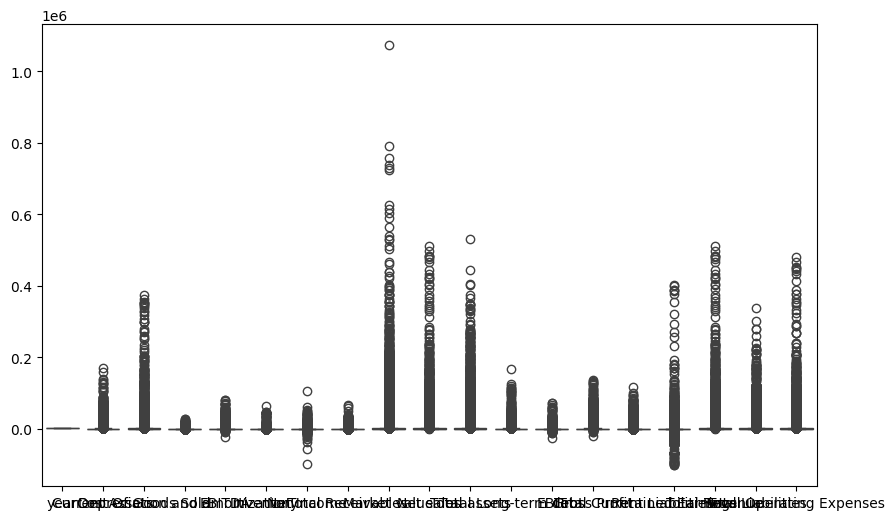

In [383]:
df_AB.describe()

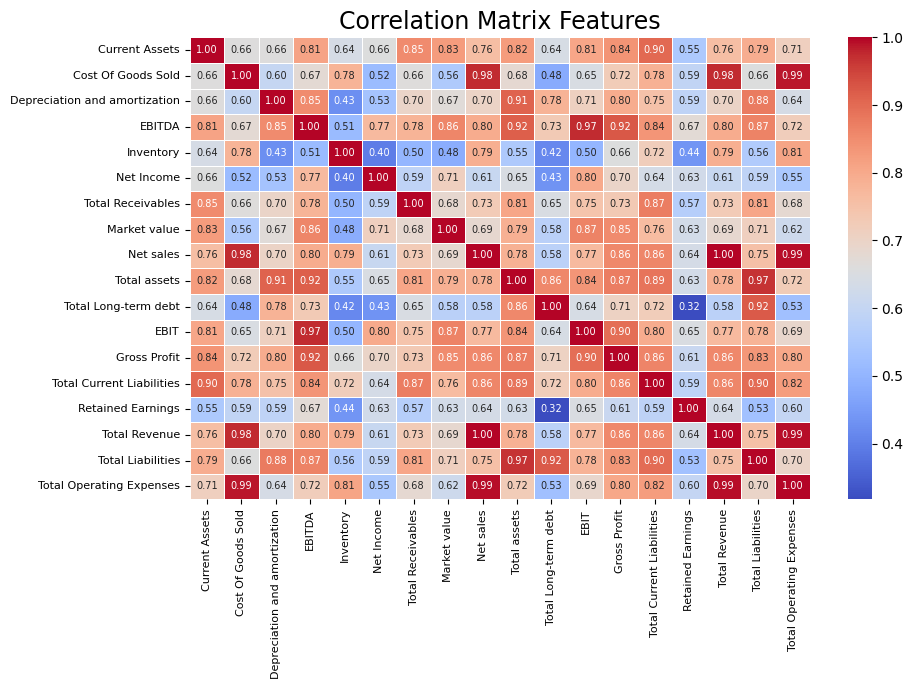

In [384]:
Features = df_AB.drop(['company_name', 'status_label', 'year' ], axis=1)


# Correlation matrix
corr = Features.corr()

plt.figure(figsize=(10, 6))
# mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            #mask=mask,
            fmt='.2f',
            linewidth=0.5,
            annot_kws={'size':7})

plt.title('Correlation Matrix Features', fontsize=17)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [385]:
bankrupt_companies = df_AB[df_AB['status_label'] == 1]

# Group by 'company_name' and get the last year they went bankrupt
last_bankruptcy_year = bankrupt_companies.groupby('company_name')['year'].max().reset_index()

# Rename the columns for clarity
last_bankruptcy_year.columns = ['company_name', 'last_bankruptcy_year']

last_bankruptcy_year

,company_name,last_bankruptcy_year
0,C_1020,2004
1,C_1046,2017
2,C_1058,2014
3,C_1085,2004
4,C_1114,2007
...,...,...
604,C_8961,2012
605,C_920,2010
606,C_922,2010
607,C_926,2012


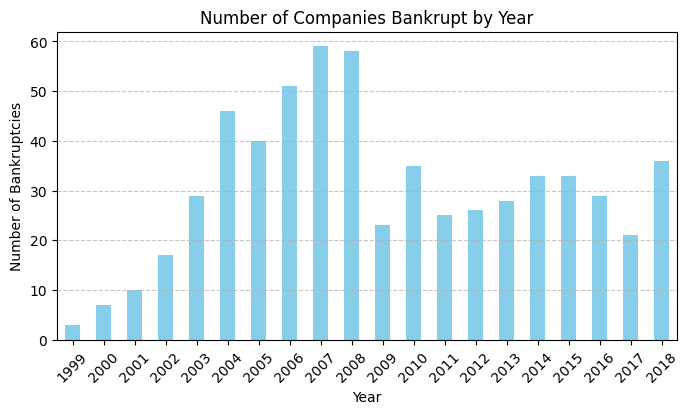

In [386]:
bankruptcies_per_year = last_bankruptcy_year['last_bankruptcy_year'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(8, 4))
bankruptcies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Companies Bankrupt by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bankruptcies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Feature Selection and Train Test Splitting of Data

In [387]:
X = df_AB.drop(['company_name', 'status_label'], axis=1)
Y = df_AB['status_label']
Y

0        0
1        0
2        0
3        0
4        0
        ..
78677    0
78678    0
78679    0
78680    0
78681    0
Name: status_label, Length: 78682, dtype: int64

#### Splitting the data: Train/Test Splitting 

In [388]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

X_train.head(10)

,year,Current Assets,Cost Of Goods Sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
22336,2002,262.580,1481.754,2.222,20.500,5.144,9.872,177.360,219.2270,1546.897,312.287,3.321,18.278,65.143,180.359,114.334,1546.897,184.557,1526.397
215,2016,65.463,76.596,2.422,10.865,37.237,5.851,20.021,85.0203,124.574,92.066,32.936,8.443,47.978,12.820,39.525,124.574,45.946,113.709
53303,2017,192.461,1248.080,94.776,306.668,0.000,156.963,117.138,5453.2220,1740.905,2468.644,1046.011,211.892,492.825,460.655,1.847,1740.905,1719.584,1434.237
64910,2006,45.624,13.683,8.448,-2.707,0.000,-7.716,15.654,243.5657,64.527,137.568,0.050,-11.155,50.844,50.984,-52.106,64.527,51.815,67.234
10180,2014,59311.000,18851.000,3895.000,25252.000,8184.000,16323.000,10985.000,291041.6291,74331.000,131119.000,15122.000,21357.000,55480.000,25085.000,86523.000,74331.000,61367.000,49079.000
3324,2013,1535.000,2082.500,113.900,477.500,298.800,209.700,399.600,5054.5246,2943.000,3493.000,751.000,363.600,860.500,376.400,1912.800,2943.000,1506.900,2465.500
48751,2012,5.769,8.040,0.695,-3.335,1.448,-4.695,2.132,11.3336,17.027,12.676,0.000,-4.030,8.987,7.289,-114.726,17.027,12.050,20.362
32390,2001,3.470,4.596,1.664,3.105,0.350,2.540,1.600,35.0235,11.554,33.097,10.421,1.441,6.958,6.325,1.573,11.554,17.890,8.449
53904,2005,18.218,13.643,1.762,10.177,1.183,5.236,5.679,118.4358,32.437,44.675,0.000,8.415,18.794,10.160,23.660,32.437,12.082,22.260
60111,2006,40.595,149.289,15.193,54.437,0.000,18.999,32.535,284.9836,227.769,686.264,358.978,39.244,78.480,27.295,48.208,227.769,448.548,173.332


In [411]:
from sklearn.linear_model import LogisticRegression 
LR = LogisticRegression(max_iter=10000)
LR.fit(X_train, y_train)
LR.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [412]:
LR.score(X_test,y_test)

0.9323872061004025

In [416]:
# Get the feature importance (coefficients) from logistic regression
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': LR.coef_[0]
})

# Display feature importance
print(feature_importance.sort_values(by='Coefficient', ascending=False))

                          Feature  Coefficient
5                       Inventory     0.000469
14      Total Current Liabilities     0.000235
3   Depreciation and amortization     0.000204
17              Total Liabilities     0.000082
11           Total Long-term debt     0.000059
18       Total Operating Expenses     0.000044
13                   Gross Profit     0.000031
10                   Total assets     0.000009
15              Retained Earnings    -0.000004
16                  Total Revenue    -0.000007
9                       Net sales    -0.000007
7               Total Receivables    -0.000027
2              Cost Of Goods Sold    -0.000039
4                          EBITDA    -0.000051
6                      Net Income    -0.000061
8                    Market value    -0.000165
12                           EBIT    -0.000255
1                  Current Assets    -0.000437
0                            year    -0.001248


In [391]:
from sklearn import tree
DCT = tree.DecisionTreeClassifier()
DCT.fit(X_train,y_train)

DecisionTreeClassifier()

In [392]:
DCT.score(X_test,y_test)

0.8945986019911035

In [403]:
from sklearn.svm import SVC
SVM_model = SVC()

SVM_model.fit(X_train,y_train)

SVC()

In [404]:
SVM_model.score(X_test,y_test)

0.9323448421944504

In [395]:
from sklearn.ensemble import RandomForestClassifier 

RFC = RandomForestClassifier() 

RFC.fit(X_train,y_train)

RandomForestClassifier()

In [415]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': RFC.feature_importances_
})

# Display feature importance
print(feature_importance.sort_values(by='Importance', ascending=False))

                          Feature  Importance
8                    Market value    0.065985
15              Retained Earnings    0.061681
3   Depreciation and amortization    0.059013
1                  Current Assets    0.057708
17              Total Liabilities    0.056093
7               Total Receivables    0.056022
13                   Gross Profit    0.055509
6                      Net Income    0.054383
10                   Total assets    0.054222
14      Total Current Liabilities    0.053147
11           Total Long-term debt    0.051227
12                           EBIT    0.049551
2              Cost Of Goods Sold    0.049515
18       Total Operating Expenses    0.049369
5                       Inventory    0.048952
4                          EBITDA    0.048254
9                       Net sales    0.045899
16                  Total Revenue    0.045082
0                            year    0.038389


In [396]:
RFC.score(X_test,y_test)

0.9361999576360941

In [399]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
GNB = GaussianNB()

# Train the model
GNB.fit(X_train, y_train)


GaussianNB()

In [400]:
GNB.score(X_test,y_test)

0.14306291040033892

In [419]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy: {:.2f}%".format(accuracy_knn*100))

knn_model.score(X_test,y_test)

<class 'NameError'>: name 'accuracy_score' is not defined

In [408]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Predictions
y_pred = xgb_model.predict(X_test)

xgb_model.score(X_test,y_test)

0.9374285109087058